### Random Forest 


1) Random Forest is an ensemble machine learning technique capable of performing both regression and classification tasks using multiple decision trees and a statistical technique called <b>Bagging (Bootstrap Aggregation)</b><br>
2) A Random Forest uses two key concepts that give it the name random:<br>
<b>
a) Random sampling of training observations (rows) when building trees.<br>
b) Random subsets of features (columns) for splitting nodes.<br>
</b>
3) Random forest builds multiple decision trees and merge their predictions together to get a more accurate and stable prediction rather than relying on individual decision trees.<br>
4) Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest generates a class prediction and the class with the most votes becomes our model’s prediction.<br>
5) <b>Random Forest Intuition </b>- A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.<br>
6) It uses Bootstrapping (selection with replacement) to select random subsets of records and/or columns for creating individual decision trees. It means that some samples might be used multiple times in a single tree.<br>


#### Example
1) There are 100 rows of data<br>
2) The target variable(y) has 2 categories - A and B<br>
3) In Random Forest, we are constructing 7 Decision Trees<br>
4) Suppose out of 7 DT (DT1,DT2,......,DT7), row 37 is a part of DT1, DT3, DT4, DT5, DT6.<br>
5) Predictions generated by Decision Trees for row no 37 are:<br>
        
       DT1 -> A
       DT3 -> B
       DT4 -> A
       DT5 -> A
       DT6 -> B
6) Prediction out of Random Forest for row no 37 is mode of these predictions (3A and 2B) -> Majority Voting(3,2) = 3<br>
7) Prediction for Row no 37 is Category A according to Random Forest.
      

### Bootstrapping
Bootstrapping is randomly selecting samples from training data with replacement. The samples so generated are called as bootstrap samples.

<img src="bootstrap.png">

### Bagging
<img src="bagging1.png">

### Working of Random Forest

1)	Select random samples from a given dataset.<br>
2)	Construct a decision tree for each sample and get a prediction result from each decision tree.<br>
3)	Perform a vote for each predicted result.<br>
4)	Select the prediction result with the most votes as the final prediction.<br>

a)	The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. <br>
b)	The final predictions of the random forest are made by averaging the predictions of each individual tree. <br>
c)	The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. <br>

<img src="rf1.png">

### HyperParameters of RandomForest

<b>1) n_estimators :</b>  This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.

<b>2) min_samples_split :</b> The minimum number of samples required to split an internal node. The algorithm keeps splitting the nodes as long as a node has more samples (data points) than the number specified with min_samples_split parameter.

<b>3) criterion:</b> gini or entropy for classification and mse for regression.

<b>4) max_features:</b> These are the maximum number of features Random Forest is allowed to try in individual tree. The values it can have are:-<br>
    
    a) Auto/None : This will simply take all the features which make sense in every tree. Here we simply do not put any restrictions on the individual tree.
    b) sqrt : This option will take square root of the total number of features in individual run. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree. “log2” is another similar type of option for max_features.
    c) 0.x : This option allows the random forest to take x% of variables in individual run. We can assign and value in a format “0.x” where we want x% of features to be considered.

<b>5) bootstrap :</b>  True/False. If it is set to true samples are drawn with replacement and samples are drawn without replacement if bootstrap is set to false

<b> 6) oob_score :</b> True/False. (oob - Out of Bag dataset)
Whether to use out-of-bag samples to estimate the generalization accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets as ds
dir(ds)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [3]:
from sklearn.datasets import load_iris,load_wine

In [4]:
wine = load_wine()
x2 = wine.data
y2 = wine.target
print(x2.shape)
print(y2.shape)
print(list(set(y2)))
print(wine.feature_names)
print(wine.)

(178, 13)
(178,)
[0, 1, 2]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [7]:
from collections import Counter
c = Counter(y2)
print(c)
print(y2)

Counter({1: 71, 0: 59, 2: 48})
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [12]:
iris = load_iris()
x1 = iris.data
y1 = iris.target
print(x1.shape)
print(y1.shape)
print(iris.feature_names)

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(list(set(y1)))

[0, 1, 2]


In [14]:
print(type(x1))
print(type(y1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
print(x1[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [17]:
df = pd.DataFrame(x1,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df['flower_type'] = y1
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
df['flower_type'].value_counts()

0    50
1    50
2    50
Name: flower_type, dtype: int64

In [20]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
flower_type          0
dtype: int64

In [22]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
flower_type            int32
dtype: object

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [37]:
def gen_model_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    print('Predictions\n',y_pred)
    acc = accuracy_score(y_test,y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

#### 1) Logistic Regression

In [38]:
m1 = LogisticRegression(max_iter=1000)
gen_model_metrics(m1,x_train,x_test,y_train,y_test)

Predictions
 [2 0 1 2 0 0 2 1 0 2 0 0 1 2 0 0 1 0 2 2 0 2 2 0 2 1 1 1 1 1 0 1 0 0 2 1 1
 1]
Training score 0.9553571428571429
Testing score 0.9473684210526315
Accuracy_Score 0.9473684210526315
Confusion Matrix
 [[14  0  0]
 [ 0 11  0]
 [ 0  2 11]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.85      1.00      0.92        11
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



#### 2) Decision Tree Classification

In [42]:
m2 = DecisionTreeClassifier(criterion='entropy',min_samples_split=15)
gen_model_metrics(m2,x_train,x_test,y_train,y_test)

Predictions
 [2 0 1 2 0 0 1 1 0 2 0 0 1 2 0 0 1 0 2 2 0 2 2 0 2 1 1 1 1 1 0 1 0 0 2 1 1
 1]
Training score 0.9642857142857143
Testing score 0.9210526315789473
Accuracy_Score 0.9210526315789473
Confusion Matrix
 [[14  0  0]
 [ 0 11  0]
 [ 0  3 10]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.79      1.00      0.88        11
           2       1.00      0.77      0.87        13

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



#### 3) Random Forest Classifier

In [43]:
m3 = RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=3,min_samples_split=10)
gen_model_metrics(m3,x_train,x_test,y_train,y_test)

Predictions
 [2 0 1 2 0 0 1 1 0 2 0 0 1 2 0 0 2 0 2 2 0 2 2 0 2 1 1 1 1 1 0 1 0 0 2 1 1
 1]
Training score 0.9732142857142857
Testing score 0.9473684210526315
Accuracy_Score 0.9473684210526315
Confusion Matrix
 [[14  0  0]
 [ 0 11  0]
 [ 0  2 11]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.85      1.00      0.92        11
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



In [45]:
from sklearn.tree import plot_tree,export_text

In [51]:
fn = iris.feature_names
cn = ['0','1','2']
print(fn)
print(cn)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['0', '1', '2']


#### Decision Tree 0

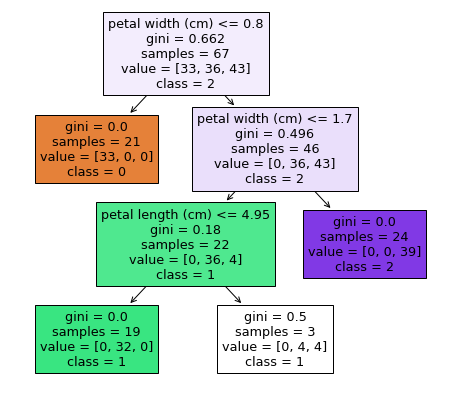

In [50]:
plt.figure(figsize=(8,7))
plot_tree(m3.estimators_[0],feature_names=fn,class_names=cn,filled=True)
plt.show()

#### Decision Tree - 5

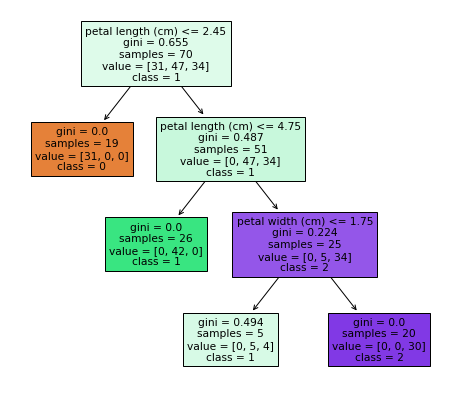

In [52]:
plt.figure(figsize=(8,7))
plot_tree(m3.estimators_[4],feature_names=fn,class_names=cn,filled=True)
plt.show()

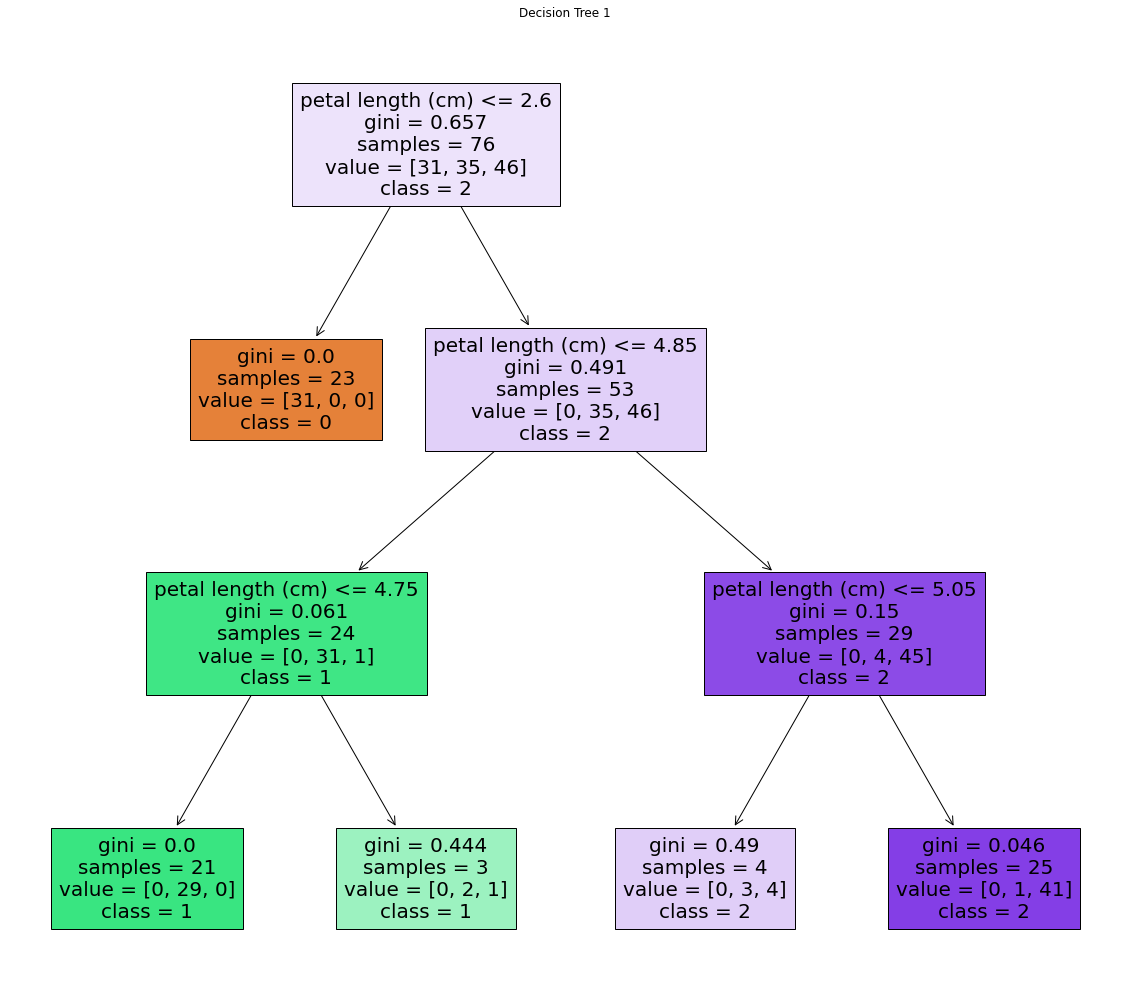

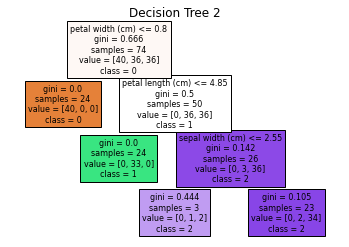

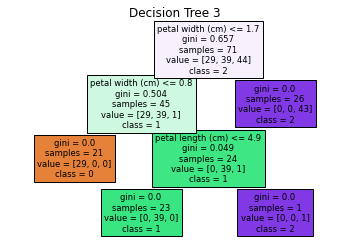

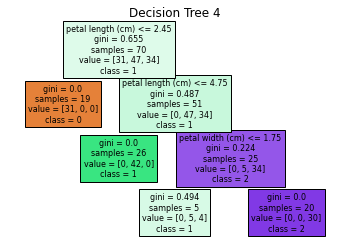

In [53]:
plt.figure(figsize=(20,18))
for i in range(1,5):  # i=1,2,3,4
    plot_tree(m3.estimators_[i],feature_names=fn,class_names=cn,filled=True)
    plt.title(f'Decision Tree {i}')
    plt.show()

### Feature Importance

In [57]:
fimp_m3 = pd.DataFrame({'Features':iris.feature_names,
                        'Norm_Imp':m3.feature_importances_})
fimp_m3.sort_values(by='Norm_Imp',ascending=False)

,Features,Norm_Imp
3,petal width (cm),0.465308
2,petal length (cm),0.430152
0,sepal length (cm),0.072878
1,sepal width (cm),0.031662
